### Time Series Forecasting Project Jupyter File

### Submitted by: Deepti Agrawal

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines.

<div class="alert alert-block alert-info">

# Sparkling Wine Dataset

As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
## Checking the current working directory
import os
os.getcwd()

'C:\\Users\\deept'

In [3]:
##Changing the Working directory
os.chdir("D:\GL\TSF")

### Q 1 Read the data as an appropriate Time Series data and plot the data.

In [4]:
df = pd.read_csv('Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
## Checking the number of observations
df.shape

(187, 2)

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [7]:
## Here we make an assumption that the date starts and ends as mentioned below
## We divide 187/12 = 15 years and convert the decimal part to 6 months
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [8]:
# Creating a new column as Time_Stamp.Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [9]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [10]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Plot the Time Series to understand the behaviour of the data.

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

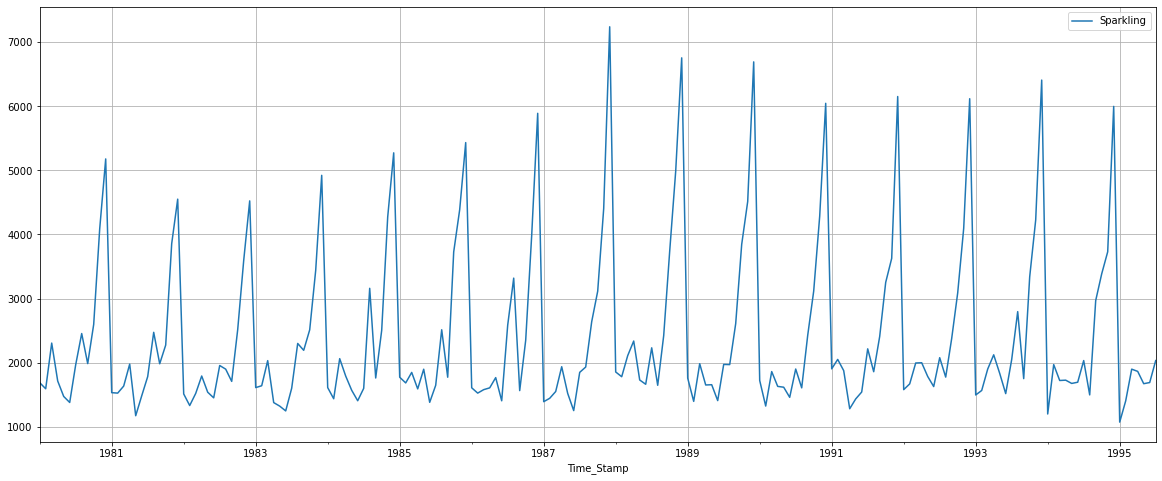

In [12]:
df.plot()
plt.grid();

- We can see that there is no trend pattern observed but a seasonal pattern is visible.

### Q 2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Checking the basic measures of descriptive statistics

In [13]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

The basic measures of descriptive statistics tell us how the Sparkling Sales have varied across years. But for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

In [14]:
## Checking for missing value
df.isnull().sum()

Sparkling    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


#### Plotting a boxplot to understand the spread of Sparkling wine sales across different years and within different months across years.

#### Yearly Boxplot

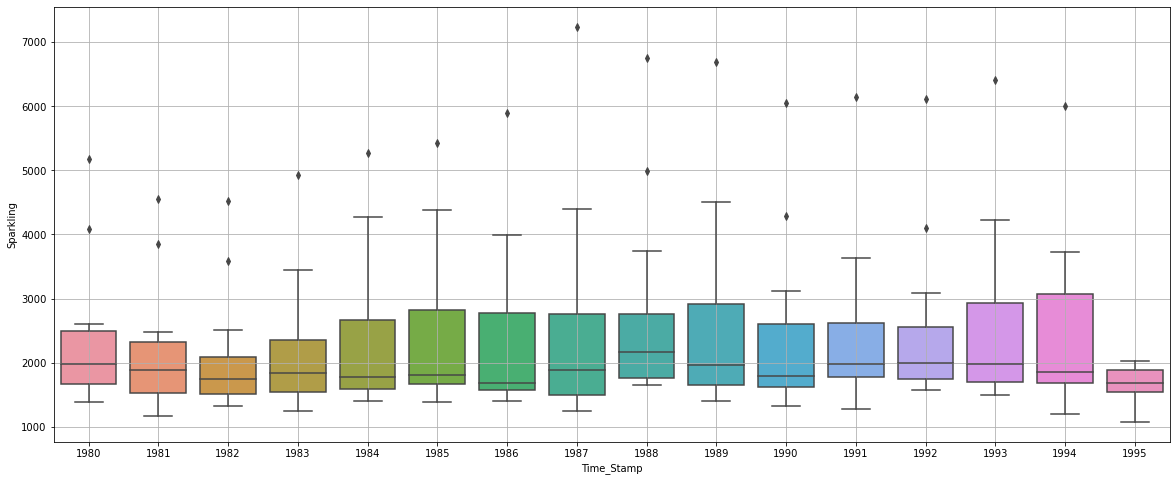

In [16]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

The yearly boxplots also shows that the Sales did not vary much in all the years.But, 1995 recorded a steep drop in Sales.



#### Monthly Plot

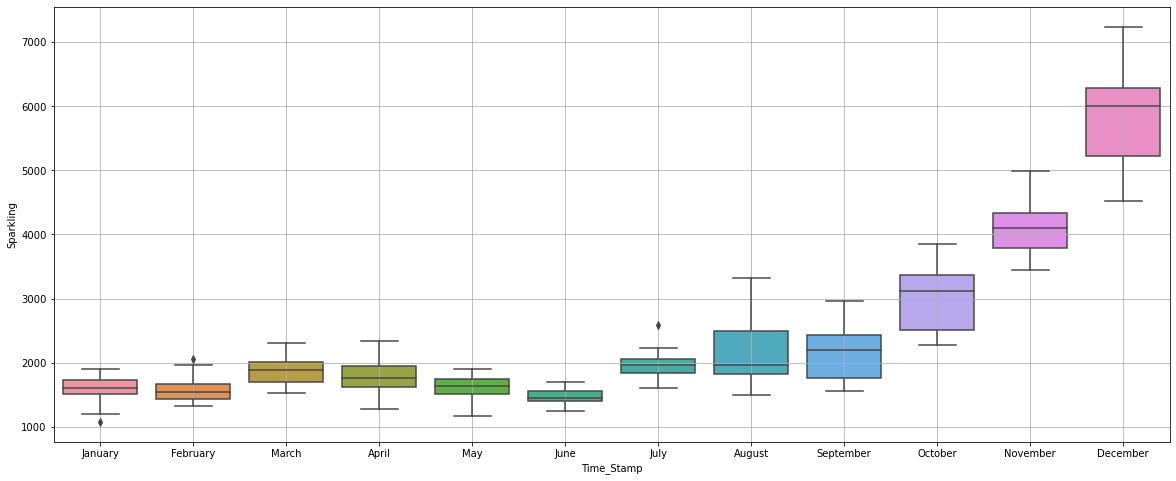

In [17]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

#### Plotting a time series monthplot to understand the spread of accidents across different years and within different months across years.

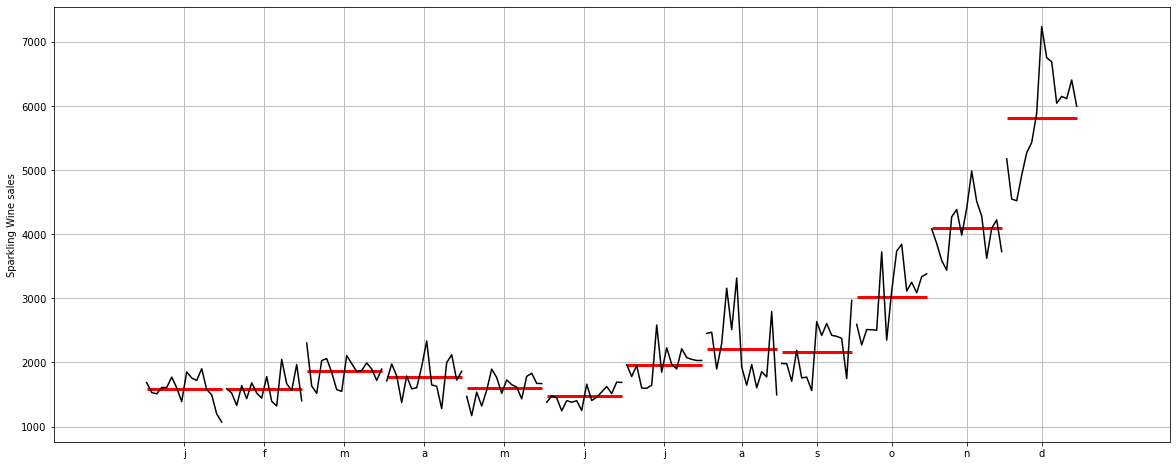

In [18]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sparkling Wine sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling' in this case) across various months. The red line is the median value.

#### Plot a graph of monthly Sparkling Sales across years

In [19]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.year, index = df.index.month)
monthly_sales_across_years.style.highlight_max()

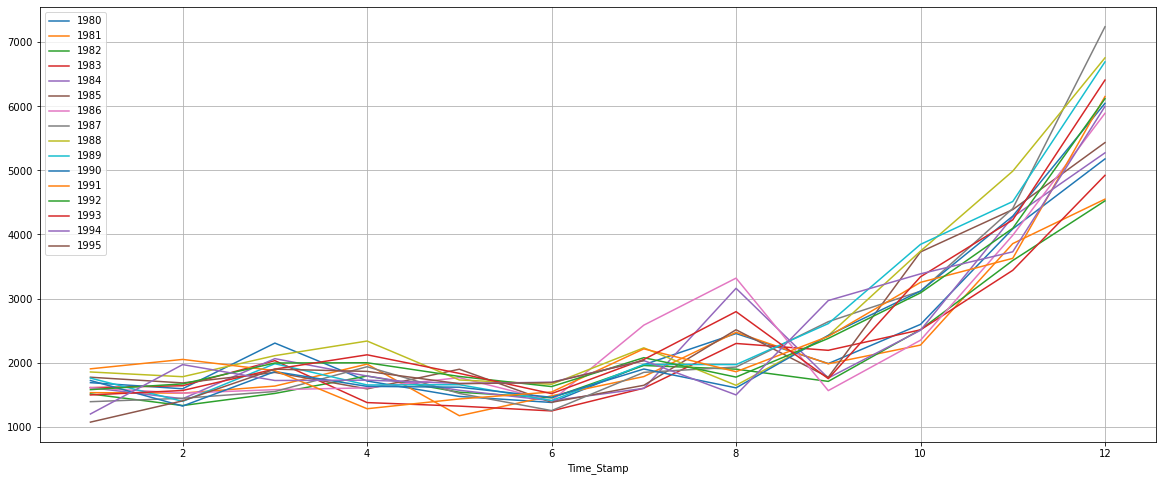

In [20]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

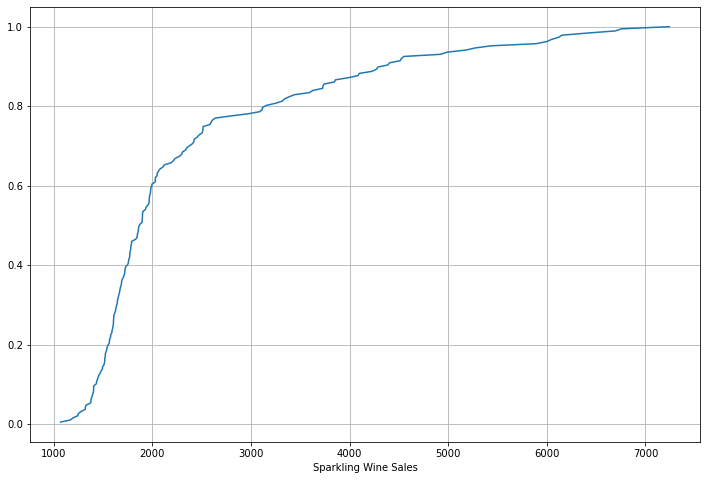

In [21]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Wine Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. 80% of the sales are below 3000. Maximum sales is close to 7100

#### Plotting the average Sales per month and the month on month percentage change of Sales

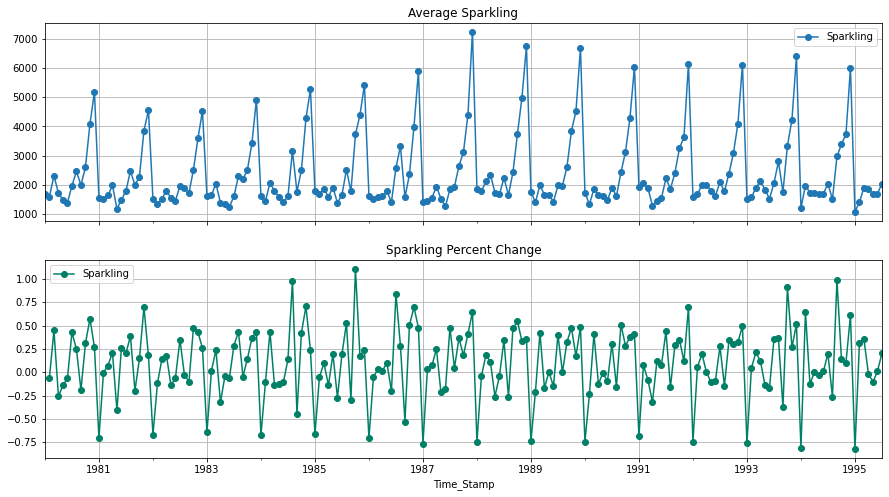

In [22]:
# group by date and get average Sparkling, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling' and the Percentage change of 'Sparkling' with respect to the time.

#### Decomposing the Time Series and plotting the different components.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Additive Decomposition

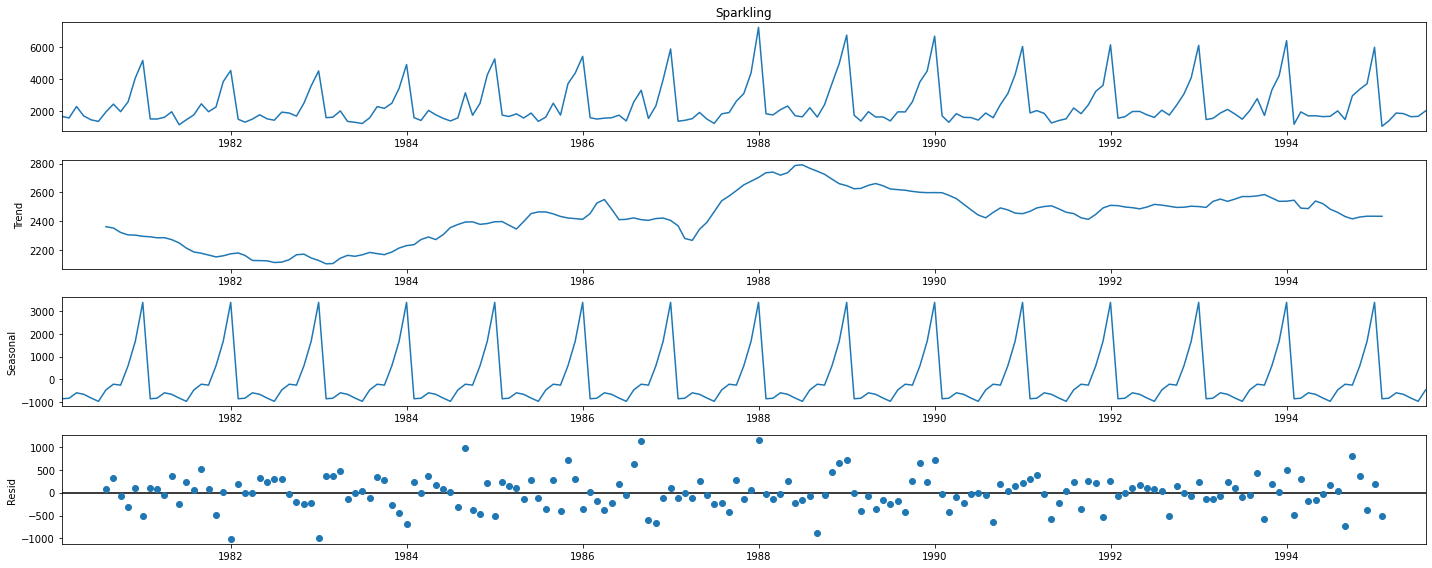

In [24]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

#### Multiplicative Decomposition

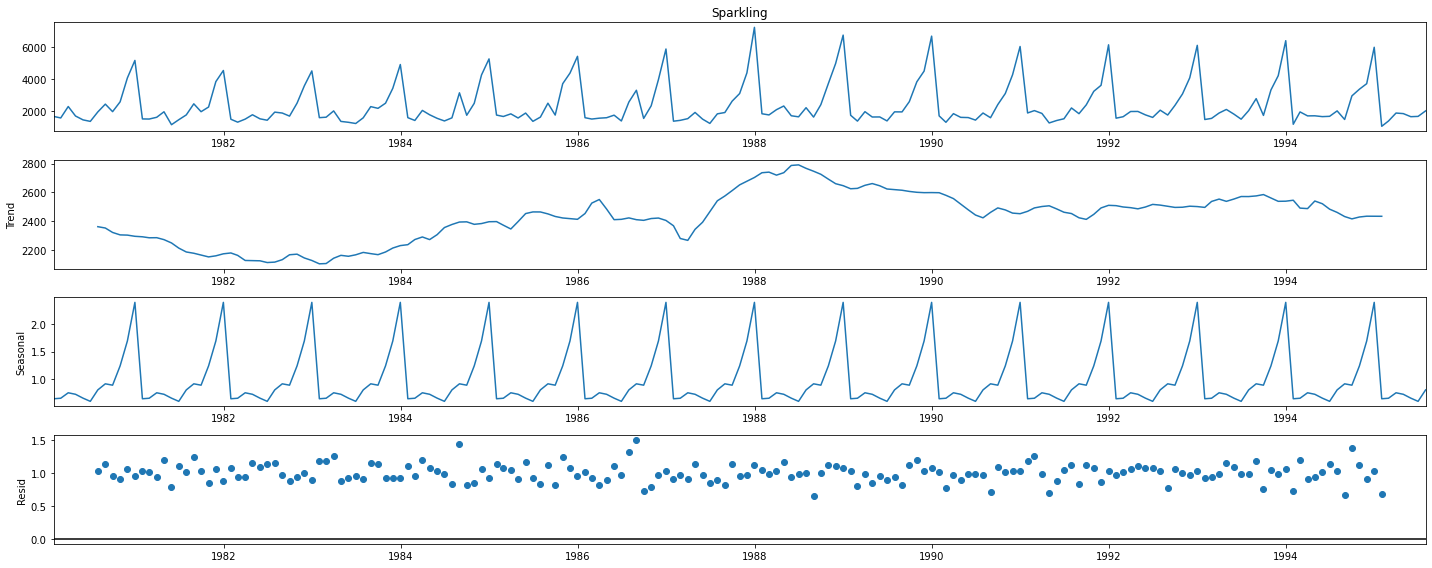

In [26]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

#### Plotting the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

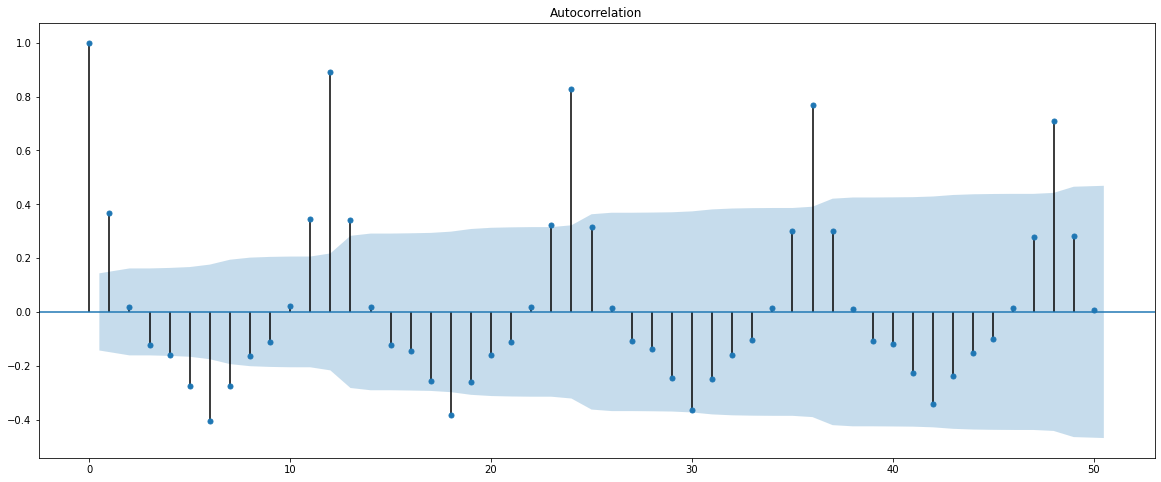

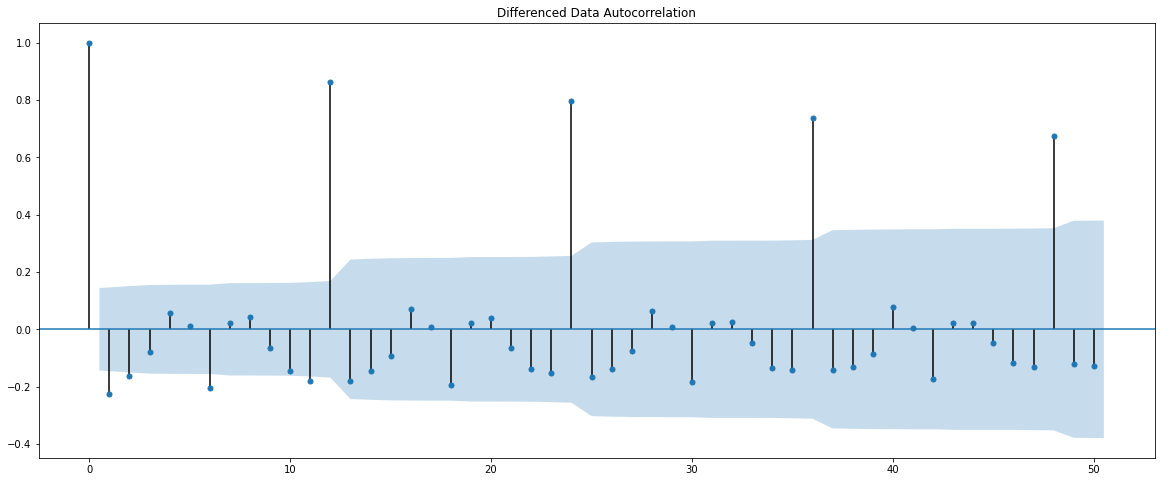

In [29]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

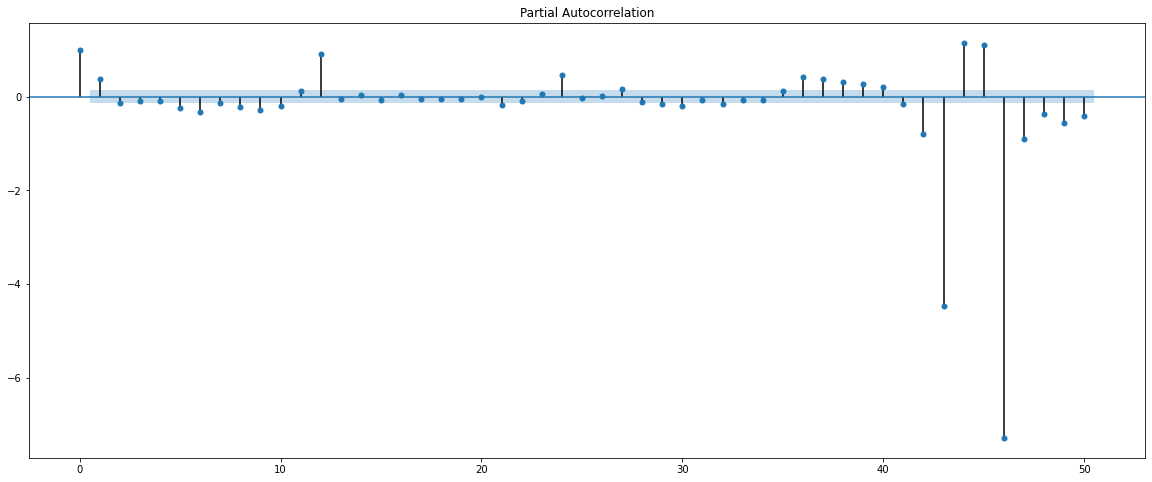

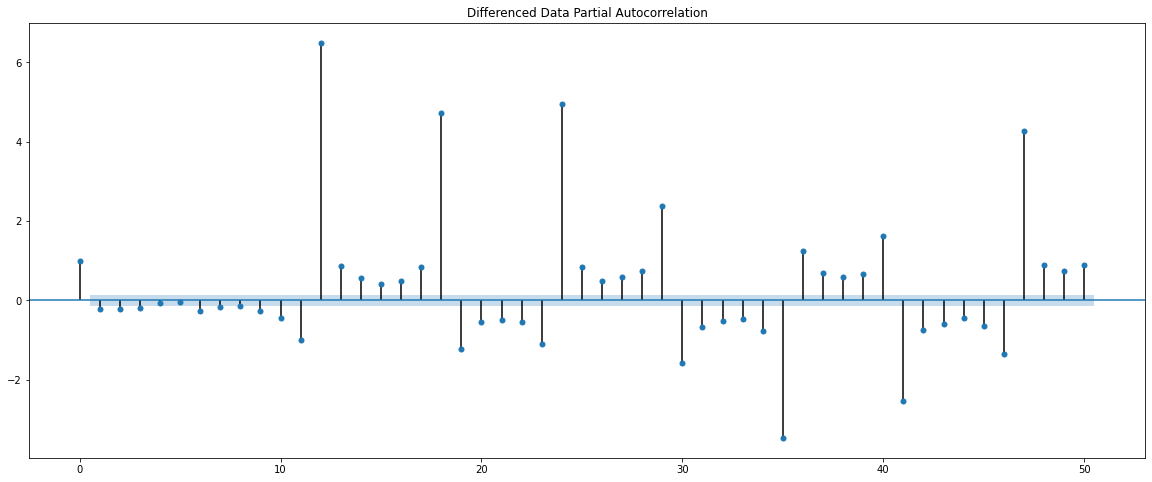

In [30]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

### Q 3 Split the data into training and test. The test data should start in 1991.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [31]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [32]:
##to display multiple data frames from one cell
from IPython.display import display

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [34]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


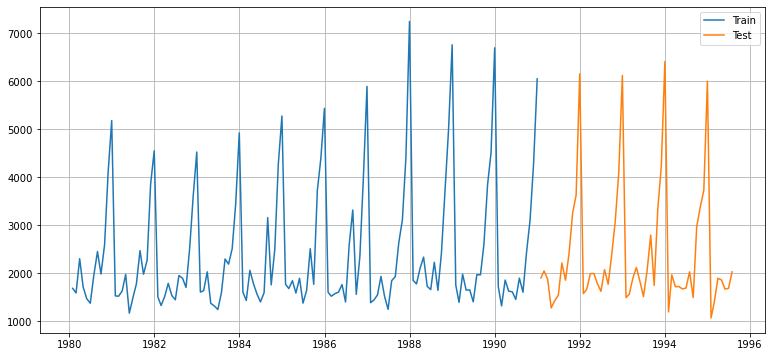

In [35]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.legend(loc='best')
plt.grid();

### Q 4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
### Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [36]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

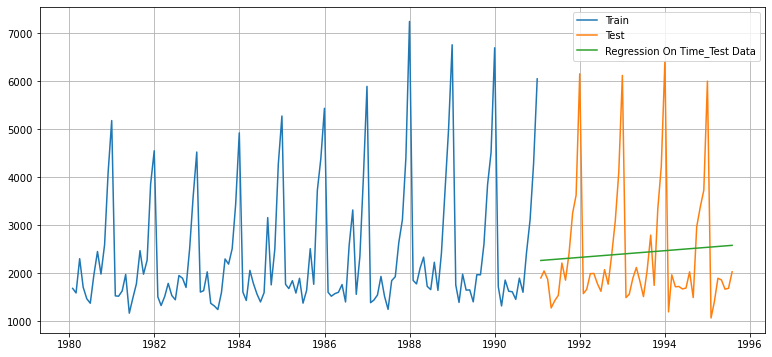

In [42]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [43]:
from sklearn import metrics

#### Model Evaluation

In [44]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [46]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [47]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

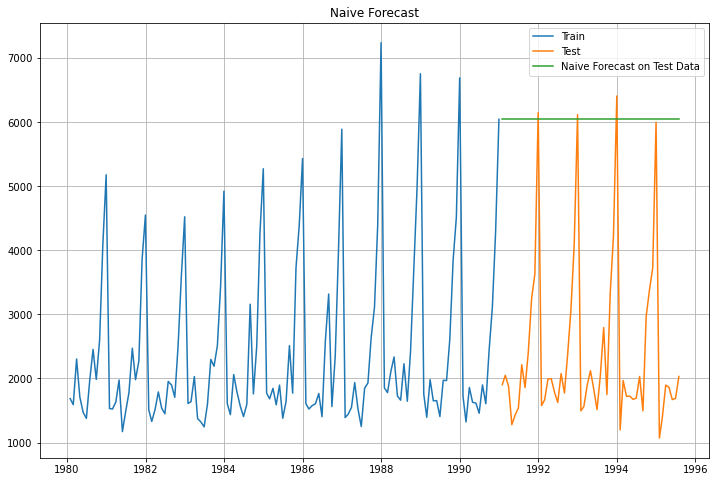

In [48]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [49]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [50]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

### Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

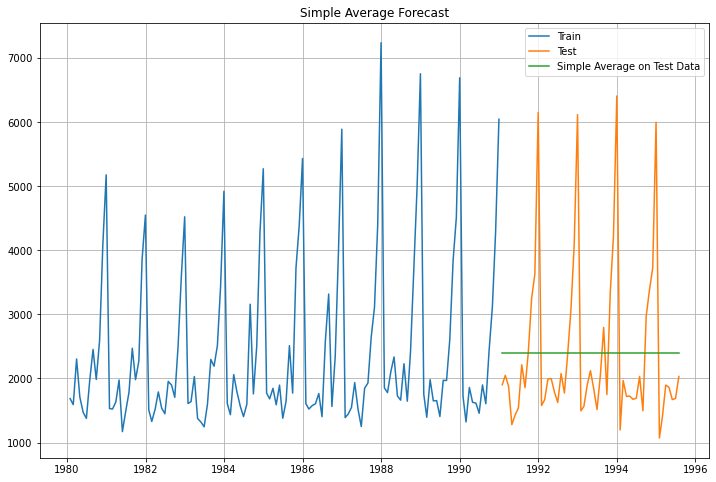

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [54]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [56]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [57]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

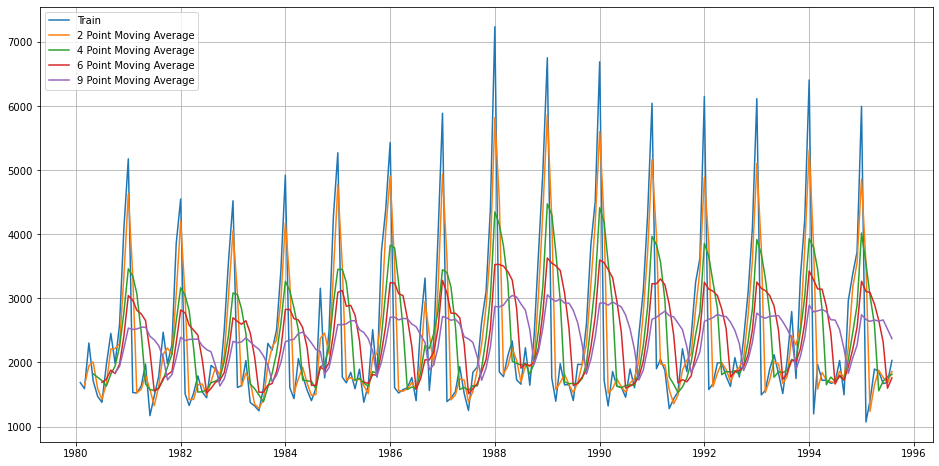

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [59]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]

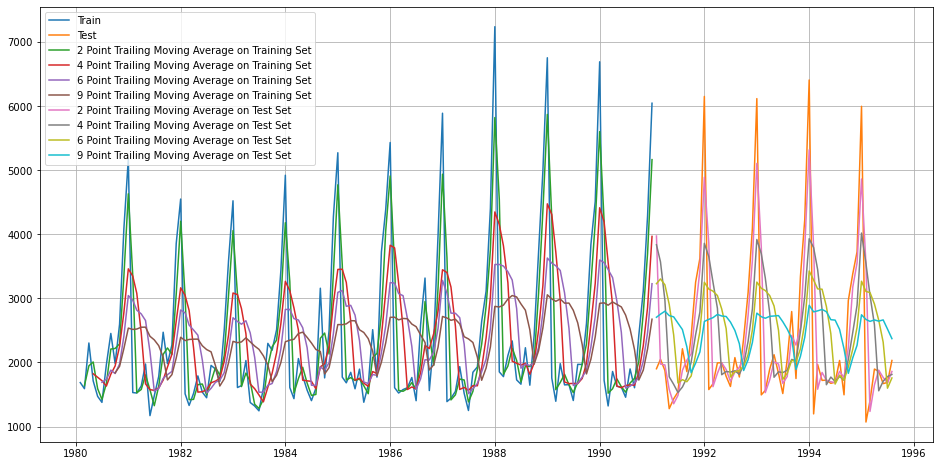

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [61]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

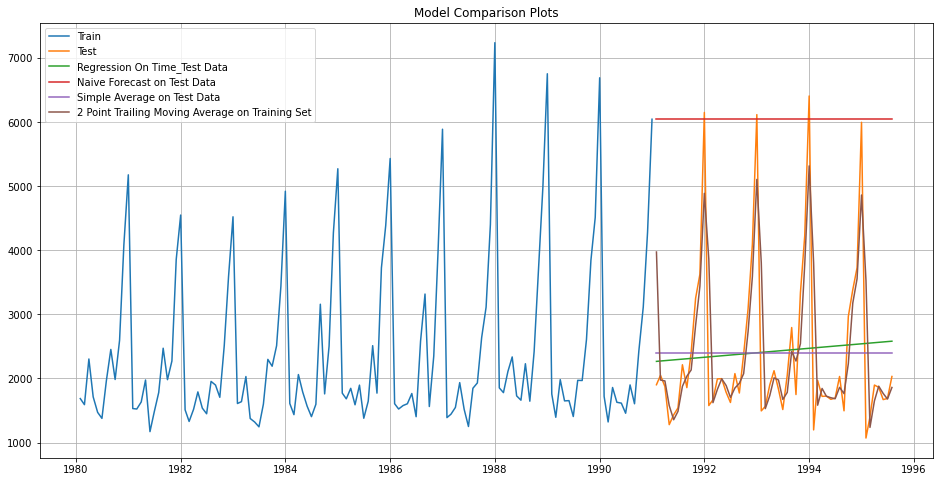

In [63]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Model 5: Simple Exponential Smoothing

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

Sparkling  predict
Time_Stamp                    
1991-01-31       1902  2724.93
1991-02-28       2049  2724.93
1991-03-31       1874  2724.93
1991-04-30       1279  2724.93
1991-05-31       1432  2724.93

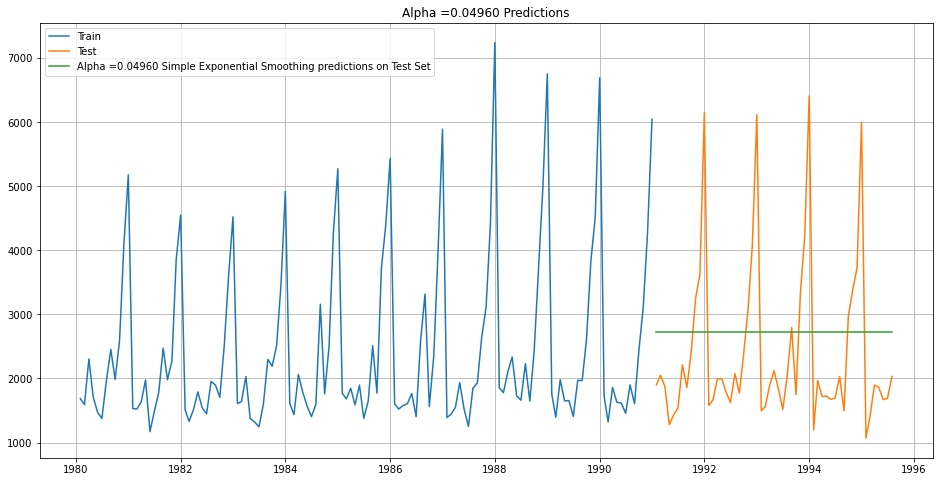

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.04960 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.04960 Predictions');

#### Model Evaluation for $\alpha$ = 0.04960 : Simple Exponential Smoothing

In [71]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.04960 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.04960 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [72]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.04960,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                            1275.87
NaiveModel                                  3864.28
SimpleAverageModel                          1275.08
2pointTrailingMovingAverage                  813.40
4pointTrailingMovingAverage                 1156.59
6pointTrailingMovingAverage                 1283.93
9pointTrailingMovingAverage                 1346.28
Alpha=0.04960,SimpleExponentialSmoothing    1316.04

#### Setting different alpha values.

###### The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [74]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

#### Model Evaluation

In [75]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
1           0.02     1328.41    1279.50
0           0.01     1362.00    1281.03
2           0.03     1318.85    1293.11
3           0.04     1317.14    1305.46
4           0.05     1318.43    1316.41
..           ...         ...        ...
94          0.95     1363.59    3778.43
95          0.96     1365.35    3796.05
96          0.97     1367.18    3813.44
97          0.98     1369.08    3830.60
98          0.99     1371.04    3847.55

[99 rows x 3 columns]

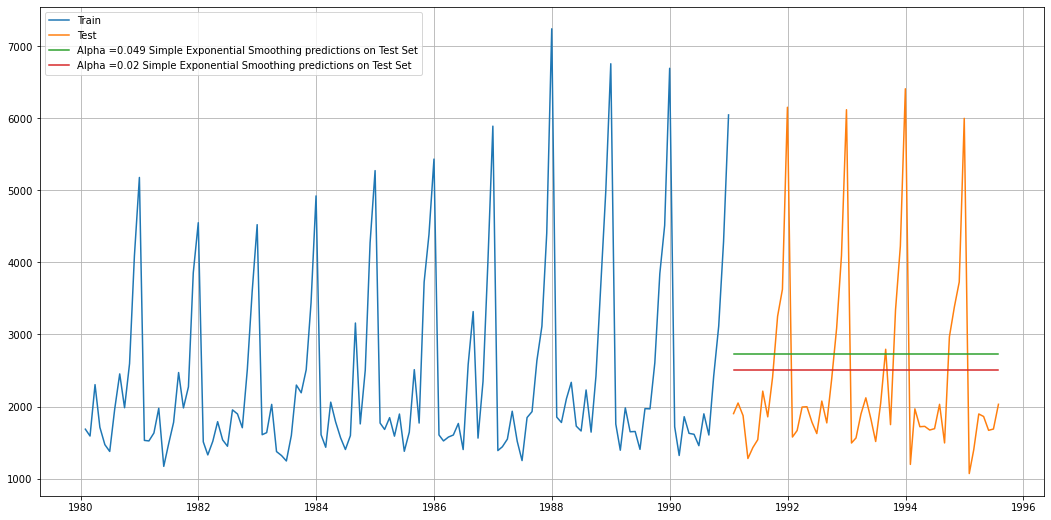

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [77]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                            1275.87
NaiveModel                                  3864.28
SimpleAverageModel                          1275.08
2pointTrailingMovingAverage                  813.40
4pointTrailingMovingAverage                 1156.59
6pointTrailingMovingAverage                 1283.93
9pointTrailingMovingAverage                 1346.28
Alpha=0.04960,SimpleExponentialSmoothing    1316.04
Alpha=0.02,SimpleExponentialSmoothing       1279.50

### Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [78]:
DES_train = train.copy()
DES_test = test.copy()

In [79]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [80]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [81]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [82]:
resultsDf_7

Alpha Values  Beta Values  Train RMSE  Test RMSE
0             0.01         0.01     4548.48    6336.38
1             0.01         0.02     3936.20    3631.15
2             0.01         0.03     3439.78    1839.36
3             0.01         0.04     3046.61    1471.75
4             0.01         0.05     2743.35    2105.19
...            ...          ...         ...        ...
9796          0.99         0.95     2015.09   58827.19
9797          0.99         0.96     2023.98   59032.97
9798          0.99         0.97     2032.96   59235.91
9799          0.99         0.98     2042.04   59436.05
9800          0.99         0.99     2051.22   59633.40

[9801 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' values.

In [83]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
148          0.02         0.50     1414.59    1274.63
115          0.02         0.17     1488.67    1275.11
254          0.03         0.57     1438.85    1276.03
255          0.03         0.58     1441.36    1278.43
253          0.03         0.56     1436.27    1278.59

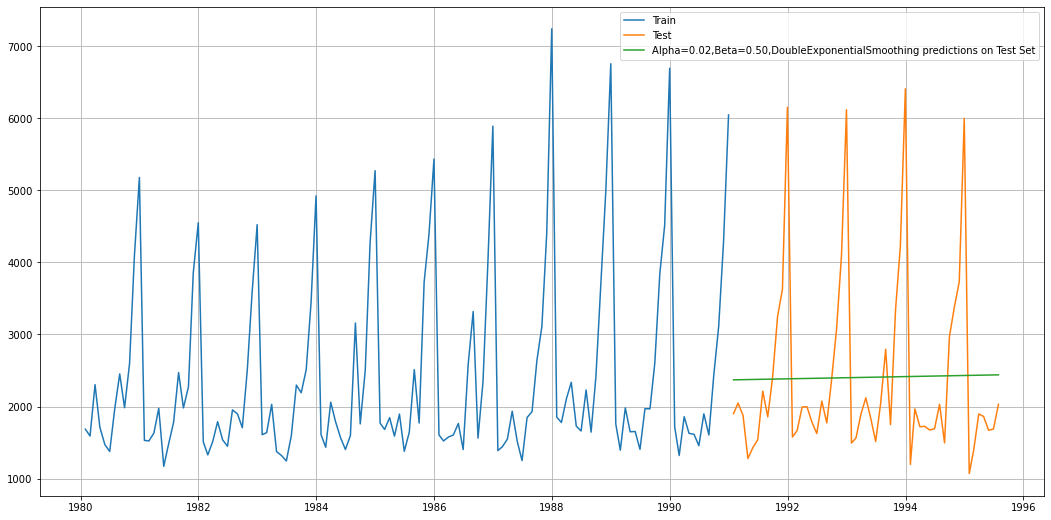

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict',0.02,0.50], label='Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [85]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                   1275.87
NaiveModel                                         3864.28
SimpleAverageModel                                 1275.08
2pointTrailingMovingAverage                         813.40
4pointTrailingMovingAverage                        1156.59
6pointTrailingMovingAverage                        1283.93
9pointTrailingMovingAverage                        1346.28
Alpha=0.04960,SimpleExponentialSmoothing           1316.04
Alpha=0.02,SimpleExponentialSmoothing              1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing    1274.63

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [86]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [88]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [89]:
model_TES_autofit.params

{'smoothing_level': 0.11107180566178311,
 'smoothing_trend': 0.06170656134860671,
 'smoothing_seasonal': 0.3950794485810031,
 'damping_trend': nan,
 'initial_level': 1640.0003926139427,
 'initial_trend': -15.114515968081134,
 'initial_seasons': array([1.03196652, 0.98906977, 1.40589009, 1.20112018, 0.93876755,
        0.95192914, 1.29600207, 1.68005327, 1.35640448, 1.79372962,
        2.82508328, 3.59807574]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902       1577.24
1991-02-28       2049       1333.62
1991-03-31       1874       1746.04
1991-04-30       1279       1630.57
1991-05-31       1432       1523.31

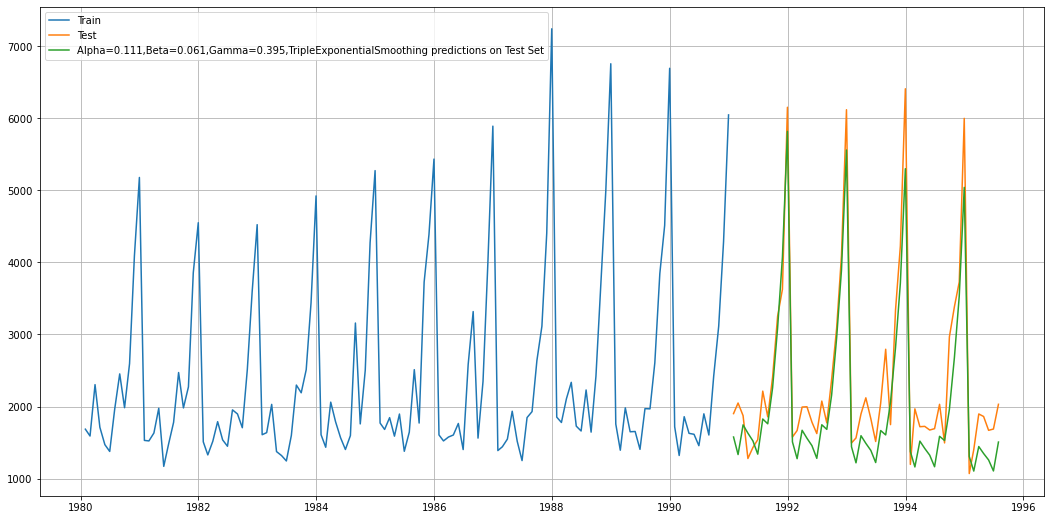

In [91]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [92]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.593


In [93]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59

In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [95]:
for i in np.arange(0.01,0.07,0.01):
    for j in np.arange(0.01,0.07,0.01):
        for k in np.arange(0.01,0.07,0.01):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [96]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0            0.01         0.01          0.01     1267.55    1757.96
1            0.01         0.01          0.02     1251.13    1776.51
2            0.01         0.01          0.03     1235.54    1798.94
3            0.01         0.01          0.04     1220.74    1824.99
4            0.01         0.01          0.05     1206.68    1854.41
..            ...          ...           ...         ...        ...
211          0.06         0.06          0.02      407.10     430.34
212          0.06         0.06          0.03      403.76     418.77
213          0.06         0.06          0.04      400.67     408.33
214          0.06         0.06          0.05      397.80     398.91
215          0.06         0.06          0.06      395.14     390.42

[216 rows x 5 columns]

In [97]:
TES_test.head()

Sparkling  auto_predict  (predict, 0.01, 0.01, 0.01)  \
Time_Stamp                                                         
1991-01-31       1902       1577.24                       873.10   
1991-02-28       2049       1333.62                       813.21   
1991-03-31       1874       1746.04                      1139.78   
1991-04-30       1279       1630.57                       872.93   
1991-05-31       1432       1523.31                       749.95   

            (predict, 0.01, 0.01, 0.02)  (predict, 0.01, 0.01, 0.03)  \
Time_Stamp                                                             
1991-01-31                       877.34                       880.99   
1991-02-28                       813.16                       812.54   
1991-03-31                      1116.61                      1096.81   
1991-04-30                       883.41                       891.78   
1991-05-31                       764.36                       776.31   

            (predict, 0.01, 0.01, 0.04)  (predict, 0.01, 0.01, 0.05)  \
Time_Stamp                                                             
1991-01-31                       884.05                       886.52   
1991-02-28                       811.37                       809.65   
1991-03-31                      1079.71                      1064.76   
1991-04-30                       898.27                       903.09   
1991-05-31                       786.09                       793.93   

            (predict, 0.01, 0.01, 0.060000000000000005)  \
Time_Stamp                                                
1991-01-31                                       888.41   
1991-02-28                                       807.42   
1991-03-31                                      1051.54   
1991-04-30                                       906.40   
1991-05-31                                       800.03   

            (predict, 0.01, 0.02, 0.01)  (predict, 0.01, 0.02, 0.02)  ...  \
Time_Stamp                                                            ...   
1991-01-31                      1128.76                      1133.22  ...   
1991-02-28                      1060.57                      1060.62  ...   
1991-03-31                      1499.98                      1470.65  ...   
1991-04-30                      1154.53                      1167.23  ...   
1991-05-31                       998.94                      1016.55  ...   

            (predict, 0.060000000000000005, 0.05, 0.03)  \
Time_Stamp                                                
1991-01-31                                      1790.77   
1991-02-28                                      1679.24   
1991-03-31                                      2328.20   
1991-04-30                                      1852.89   
1991-05-31                                      1608.17   

            (predict, 0.060000000000000005, 0.05, 0.04)  \
Time_Stamp                                                
1991-01-31                                      1781.18   
1991-02-28                                      1666.58   
1991-03-31                                      2283.09   
1991-04-30                                      1852.11   
1991-05-31                                      1613.14   

            (predict, 0.060000000000000005, 0.05, 0.05)  \
Time_Stamp                                                
1991-01-31                                      1772.23   
1991-02-28                                      1654.40   
1991-03-31                                      2241.87   
1991-04-30                                      1850.66   
1991-05-31                                      1617.47   

            (predict, 0.060000000000000005, 0.05, 0.060000000000000005)  \
Time_Stamp                                                                
1991-01-31                                            1763.87             
1991-02-28                                            1642.69             
1991-03-31                   

In [98]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
83           0.03         0.02          0.06      576.58     370.58
119          0.04         0.02          0.06      506.23     372.31
191          0.06         0.02          0.06      445.00     372.95
155          0.05         0.02          0.06      467.71     373.10
203          0.06         0.04          0.06      406.59     377.04

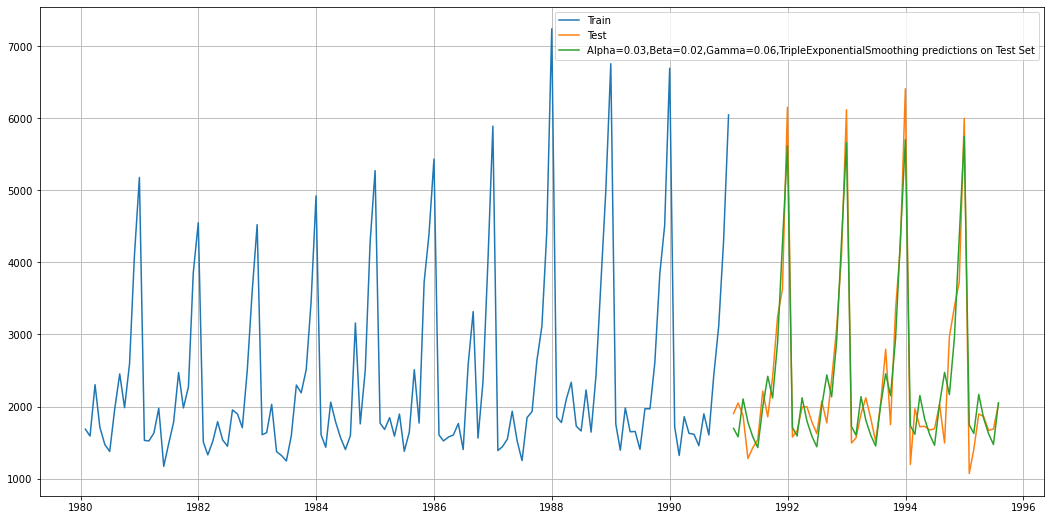

In [99]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.03,0.02,0.060000000000000005], label='Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [100]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58

In [101]:
resultsDf_8_3.head()

Test RMSE
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58

In [102]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
SimpleAverageModel                                    1275.08
RegressionOnTime                                      1275.87
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
6pointTrailingMovingAverage                           1283.93
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
9pointTrailingMovingAverage                           1346.28
NaiveModel                                            3864.28

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.03, $\beta$ = 0.02 and $\gamma$ = 0.06

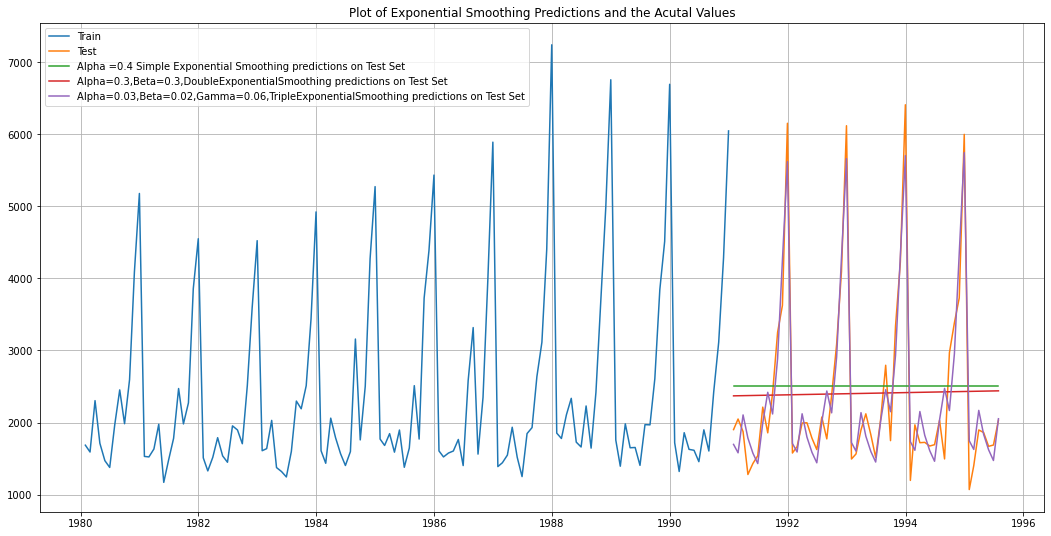

In [103]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.02,0.50], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict',0.03,0.02,0.060000000000000005], label='Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

The two models to be built on the whole data are the following:

* Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing
* Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponentialSmoothing	

### Q 5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [104]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

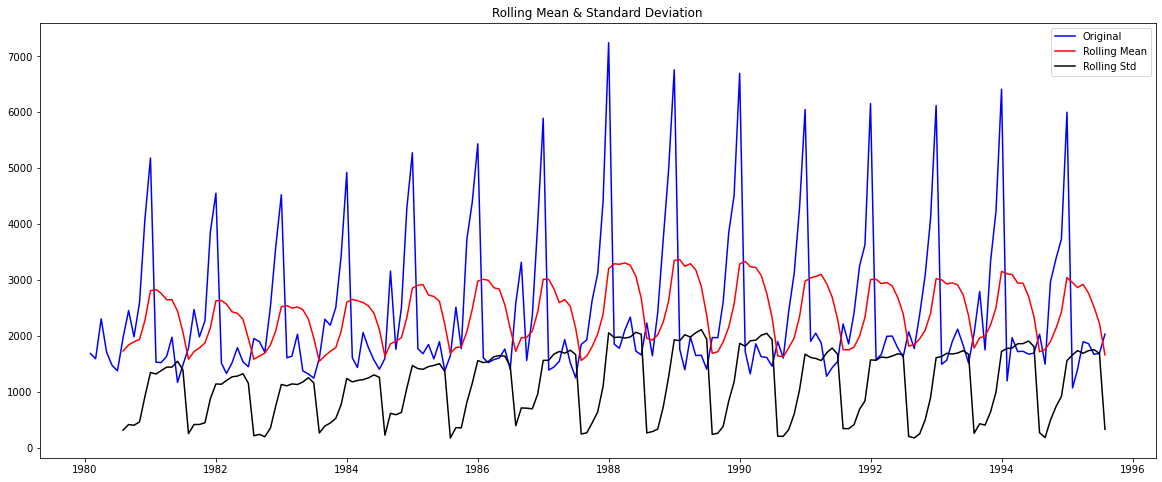

Results of Dickey-Fuller Test:
Test Statistic                 -1.36
p-value                         0.60
#Lags Used                     11.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [105]:
test_stationarity(df['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

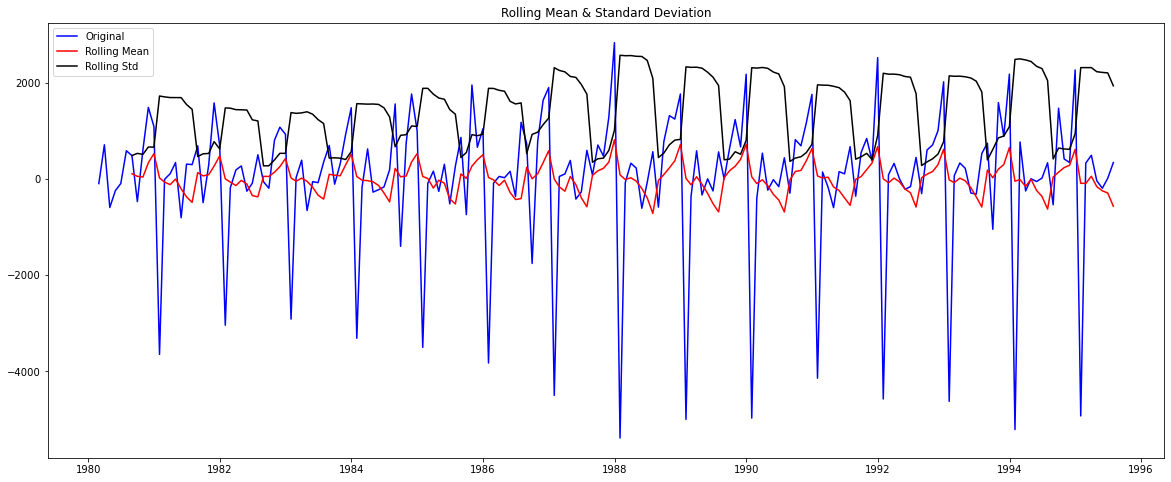

Results of Dickey-Fuller Test:
Test Statistic                -45.05
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [106]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

### Q 6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Building Automated Version of ARIMA Model

In [107]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [108]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [109]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437173329
ARIMA(0, 1, 2) - AIC:2232.783097684734
ARIMA(1, 1, 0) - AIC:2268.5280606863257
ARIMA(1, 1, 1) - AIC:2235.0139453497586
ARIMA(1, 1, 2) - AIC:2233.59764711892
ARIMA(2, 1, 0) - AIC:2262.035600081614
ARIMA(2, 1, 1) - AIC:2232.360489880371
ARIMA(2, 1, 2) - AIC:2210.6237200119594


C:\Users\deept\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [110]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param     AIC
8  (2, 1, 2) 2210.62
7  (2, 1, 1) 2232.36
2  (0, 1, 2) 2232.78
5  (1, 1, 2) 2233.60
4  (1, 1, 1) 2235.01
6  (2, 1, 0) 2262.04
1  (0, 1, 1) 2264.91
3  (1, 1, 0) 2268.53
0  (0, 1, 0) 2269.58

In [111]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.312
Method:                       css-mle   S.D. of innovations           1013.589
Date:                Sun, 25 Jul 2021   AIC                           2210.624
Time:                        14:25:07   BIC                           2227.875
Sample:                    02-29-1980   HQIC                          2217.634
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5845      0.519     10.767      0.000       4.568       6.601
ar.L1.D.Sparkling     1.2699      0.075     17.041      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


#### Predict on the Test Set using this model and evaluate the model.

In [112]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [113]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.1084496024253


In [114]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
        ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11

In [115]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.378
Date:                Sun, 25 Jul 2021   AIC                           2235.014
Time:                        14:25:08   BIC                           2246.515
Sample:                    02-29-1980   HQIC                          2239.687
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7490      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.Sparkling     0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.Sparkling    -1.

In [116]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [117]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1461.6675924806573


In [118]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67

### Building Automated version of SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

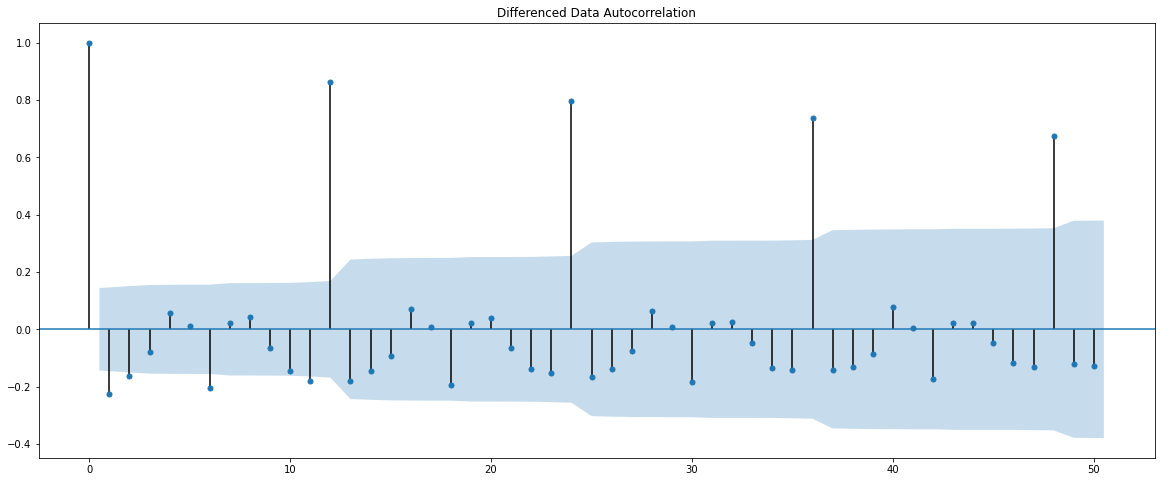

In [119]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Seasonal behavior: We look at what’s going on around lags 0, 12, 24,36 and so on.  The ACFtapers in multiples of S.
We see that there can be a seasonality of 0,12 as well as 24. We will run our auto SARIMA models by setting seasonality at both 12 and 24

#### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [120]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [121]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [122]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  ## by force you can make it TS stationary
                                            enforce_invertibility=False) ## Alpha and Beta should be unique
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843823
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236512
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456682
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301373324
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735940737
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160640903
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509936
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864961146
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572330444
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881793064
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0973022247006
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654374258
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954503507
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245086511516
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683739458115
SARIMA(0, 1

In [123]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal     AIC
50  (1, 1, 2)  (1, 0, 2, 12) 1555.58
53  (1, 1, 2)  (2, 0, 2, 12) 1556.08
26  (0, 1, 2)  (2, 0, 2, 12) 1557.12
23  (0, 1, 2)  (1, 0, 2, 12) 1557.16
80  (2, 1, 2)  (2, 0, 2, 12) 1557.69

In [124]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 25 Jul 2021   AIC                           1555.584
Time:                                    14:26:28   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

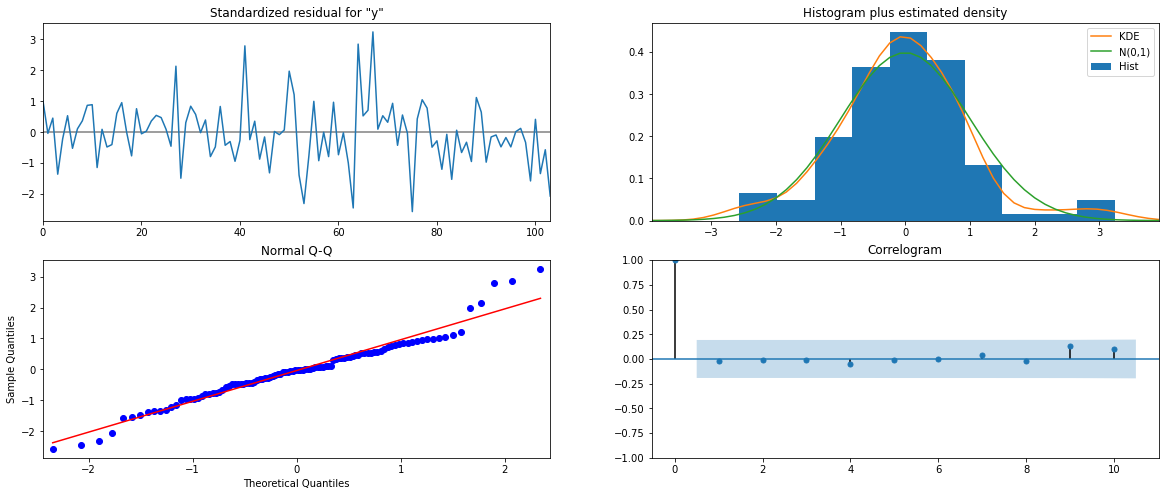

In [125]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

#### Predict on the Test Set using this model and evaluate the model.

In [126]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [127]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1327.37   388.35         566.22        2088.52
1 1315.11   402.02         527.18        2103.05
2 1621.60   402.01         833.67        2409.52
3 1598.86   407.25         800.67        2397.05
4 1392.69   407.98         593.07        2192.31

In [128]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6024251728568


In [129]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
SARIMA(1,1,2)(1,0,2,12)                                528.60

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

#### Setting the seasonality as 24 for the second iteration of the auto SARIMA model.

In [130]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 24)
Model: (0, 1, 2)(0, 0, 2, 24)
Model: (1, 1, 0)(1, 0, 0, 24)
Model: (1, 1, 1)(1, 0, 1, 24)
Model: (1, 1, 2)(1, 0, 2, 24)
Model: (2, 1, 0)(2, 0, 0, 24)
Model: (2, 1, 1)(2, 0, 1, 24)
Model: (2, 1, 2)(2, 0, 2, 24)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [132]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 24) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 24) - AIC:1763.701684169889
SARIMA(0, 1, 0)x(0, 0, 2, 24) - AIC:1356.6880047988384
SARIMA(0, 1, 0)x(1, 0, 0, 24) - AIC:1693.0587869645403
SARIMA(0, 1, 0)x(1, 0, 1, 24) - AIC:1660.733246840209
SARIMA(0, 1, 0)x(1, 0, 2, 24) - AIC:1297.6228392149117
SARIMA(0, 1, 0)x(2, 0, 0, 24) - AIC:1315.362652376716
SARIMA(0, 1, 0)x(2, 0, 1, 24) - AIC:1314.9587134905978
SARIMA(0, 1, 0)x(2, 0, 2, 24) - AIC:1294.4952313634496
SARIMA(0, 1, 1)x(0, 0, 0, 24) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 24) - AIC:1734.0340091648804
SARIMA(0, 1, 1)x(0, 0, 2, 24) - AIC:1325.7203465246287
SARIMA(0, 1, 1)x(1, 0, 0, 24) - AIC:1648.0817148420363
SARIMA(0, 1, 1)x(1, 0, 1, 24) - AIC:1588.6169219011294
SARIMA(0, 1, 1)x(1, 0, 2, 24) - AIC:1241.4412207119233
SARIMA(0, 1, 1)x(2, 0, 0, 24) - AIC:1271.7901290469872
SARIMA(0, 1, 1)x(2, 0, 1, 24) - AIC:1270.9420006407574
SARIMA(0, 1, 1)x(2, 0, 2, 24) - AIC:1235.6488945421765
SARIMA(0, 1, 

In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal     AIC
26  (0, 1, 2)  (2, 0, 2, 24) 1223.38
53  (1, 1, 2)  (2, 0, 2, 24) 1224.28
80  (2, 1, 2)  (2, 0, 2, 24) 1225.18
50  (1, 1, 2)  (1, 0, 2, 24) 1229.14
23  (0, 1, 2)  (1, 0, 2, 24) 1229.28

In [134]:
import statsmodels.api as sm

auto_SARIMA_24 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_24 = auto_SARIMA_24.fit(maxiter=1000)
print(results_auto_SARIMA_24.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 24)   Log Likelihood                -604.691
Date:                            Sun, 25 Jul 2021   AIC                           1223.383
Time:                                    14:29:10   BIC                           1240.057
Sample:                                         0   HQIC                          1230.068
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2397      0.299     -4.150      0.000      -1.825      -0.654
ma.L2          0.1253      0.215   

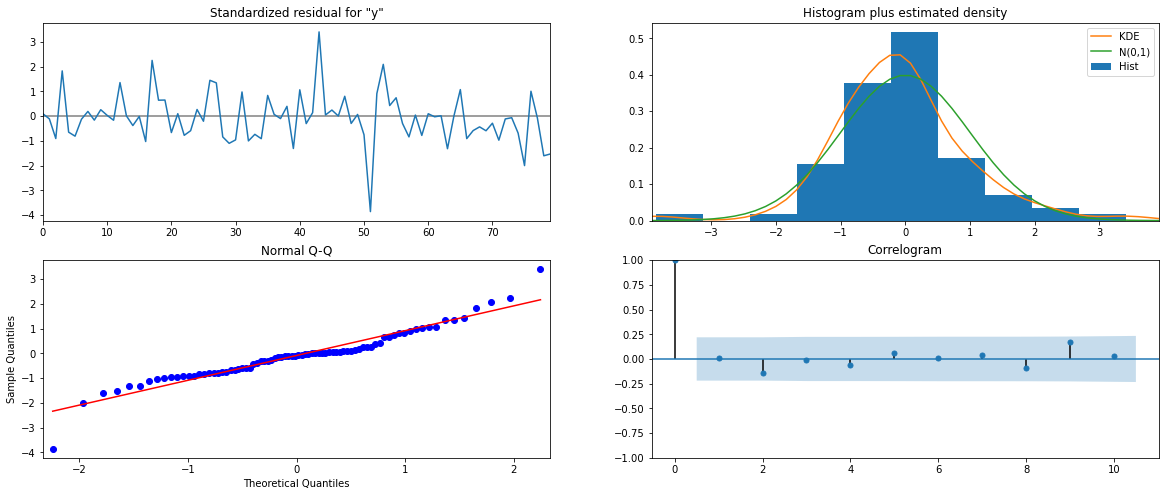

In [135]:
results_auto_SARIMA_24.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 12, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

#### Predict on the Test Set using this model and evaluate the model.

In [136]:
predicted_auto_SARIMA_24 = results_auto_SARIMA_24.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA_24.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1525.77   430.57         681.86        2369.68
1 1250.17   430.65         406.11        2094.23
2 1688.26   432.84         839.91        2536.61
3 1388.49   435.10         535.71        2241.27
4 1297.47   437.35         440.28        2154.66

In [138]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_24.predicted_mean,squared=False)
print(rmse)

639.8833123545458


In [139]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,24)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
SARIMA(1,1,2)(1,0,2,12)                                528.60
SARIMA(0,1,2)(2,0,2,24)                                639.88

We see that the RMSE value have not reduced further when the seasonality parameter was changed to 24.

### Q 7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### 1. Building a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

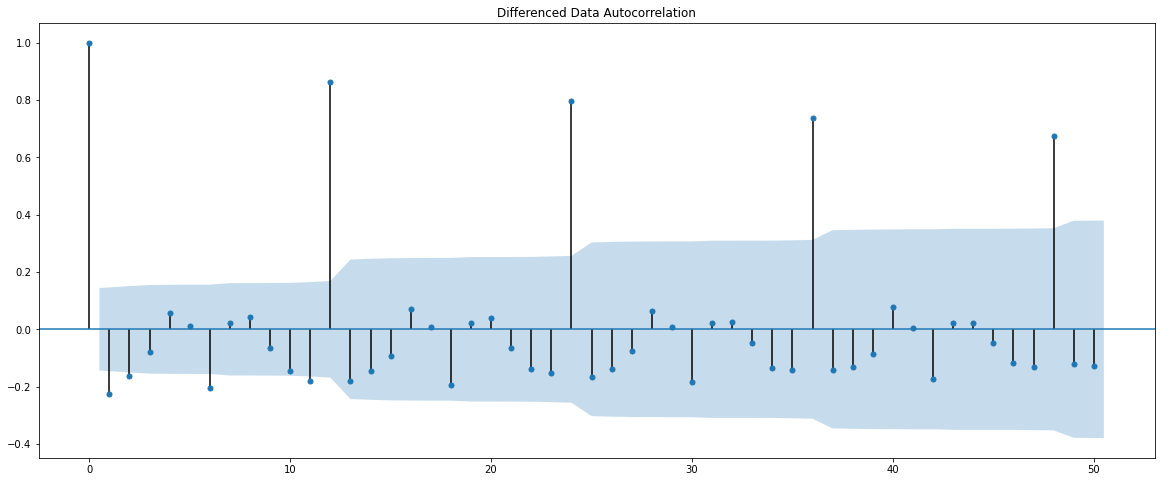

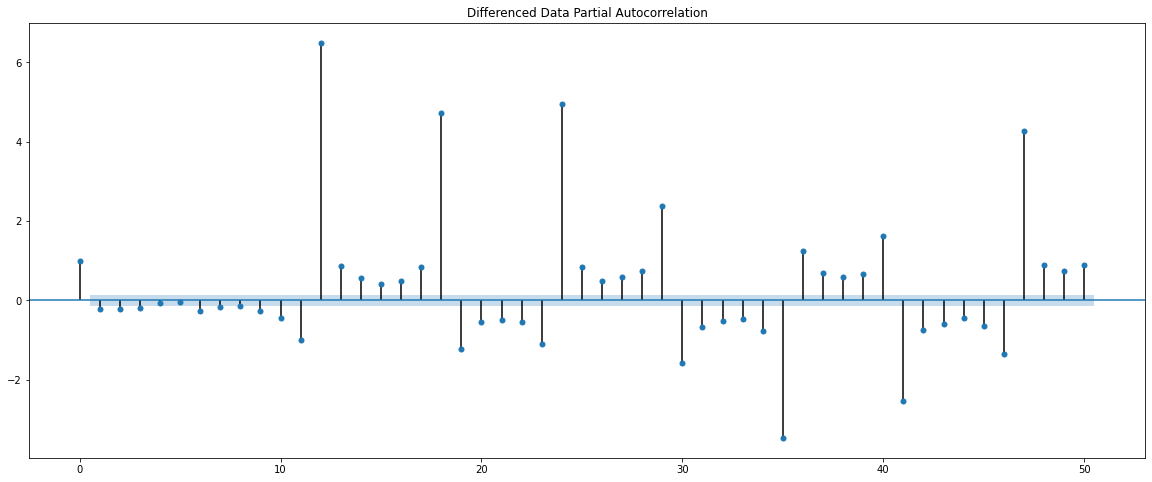

In [140]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [141]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,0,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                     ARMA(0, 0)   Log Likelihood               -1133.602
Method:                           css   S.D. of innovations           1298.484
Date:                Sun, 25 Jul 2021   AIC                           2271.203
Time:                        14:29:11   BIC                           2276.969
Sample:                    01-31-1980   HQIC                          2273.546
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.7803    113.018     21.269      0.000    2182.268    2625.292


We get a comparatively simpler model by looking at the ACF and the PACF plots.

#### Predict on the Test Set using this model and evaluate the model.

In [142]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [143]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1275.0818036965309


In [144]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,0,0)/ACF-PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
SARIMA(1,1,2)(1,0,2,12)                                528.60
SARIMA(0,1,2)(2,0,2,24)                                639.88
ARIMA(0,0,0)/ACF-PACF                                 1275.08

We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

#### 2. Building a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

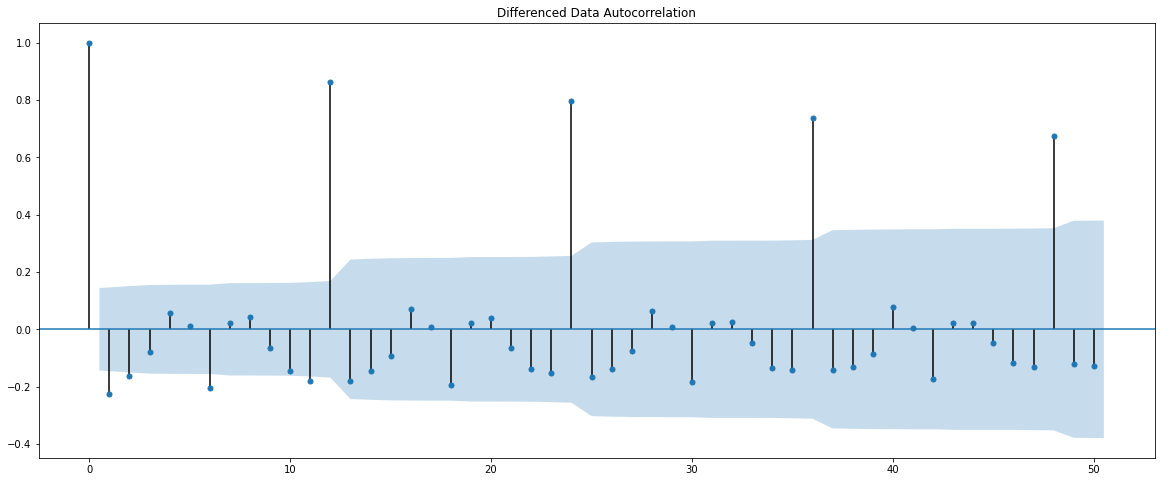

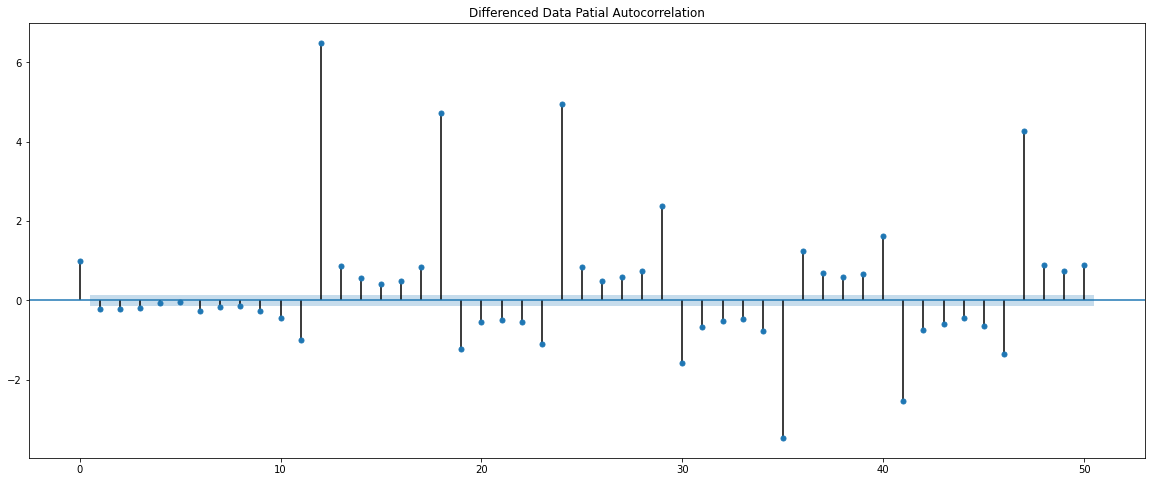

In [145]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

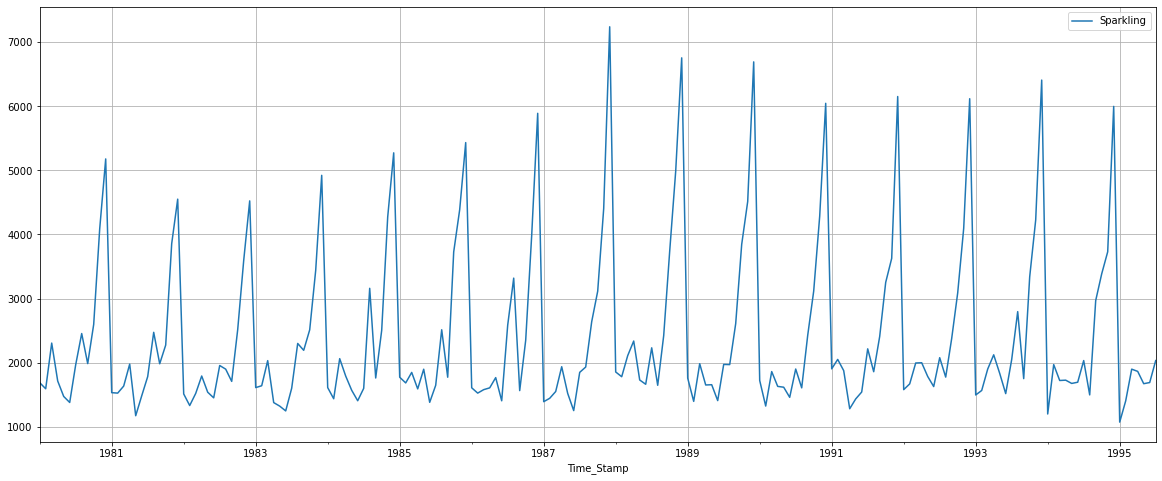

In [146]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

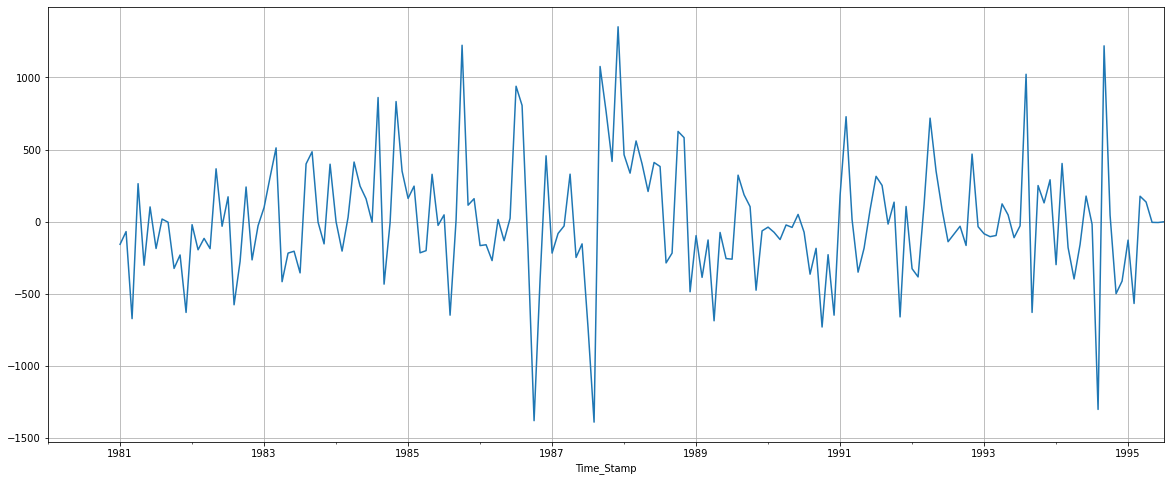

In [147]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

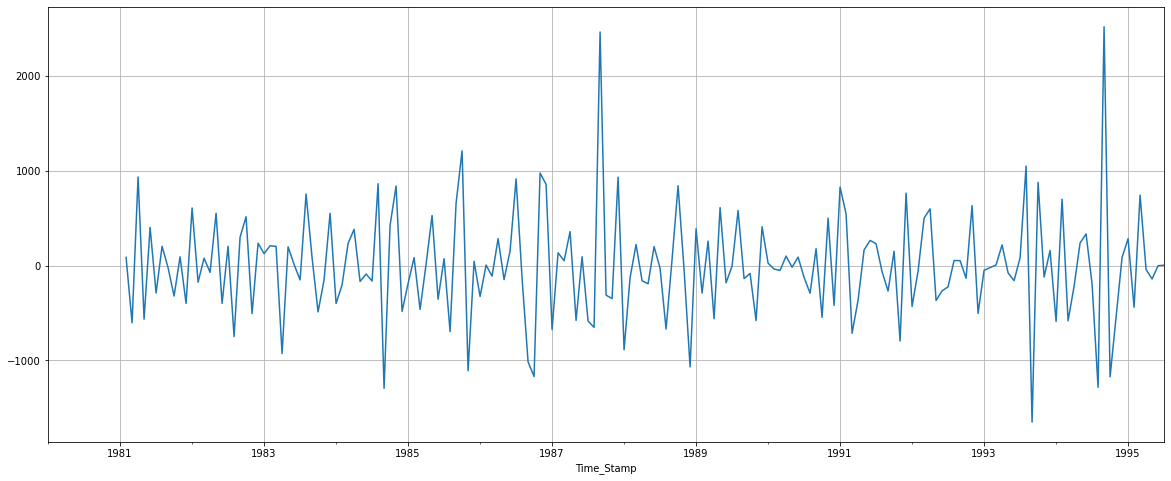

In [148]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

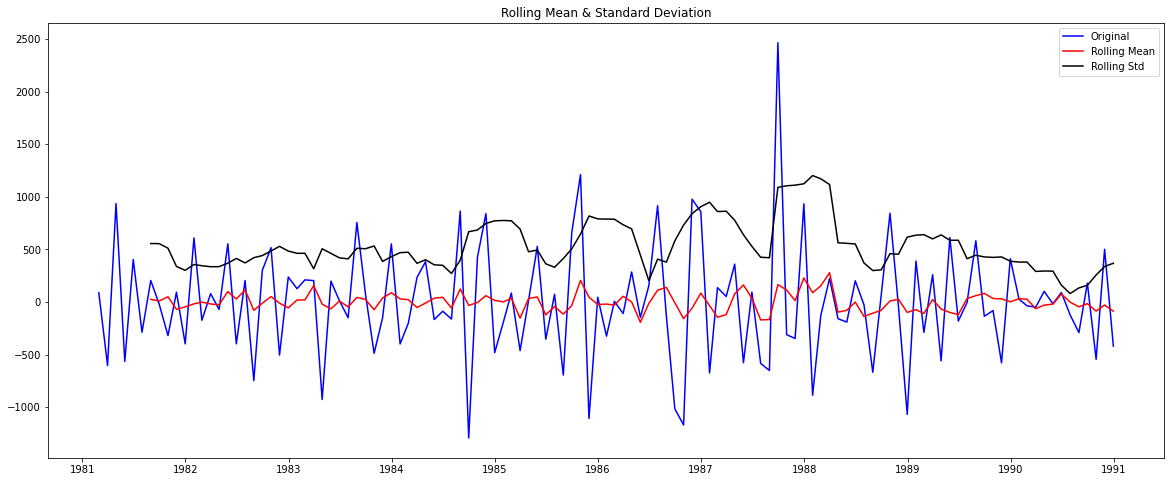

Results of Dickey-Fuller Test:
Test Statistic                 -3.34
p-value                         0.01
#Lags Used                     10.00
Number of Observations Used   108.00
Critical Value (1%)            -3.49
Critical Value (5%)            -2.89
Critical Value (10%)           -2.58
dtype: float64 



In [149]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

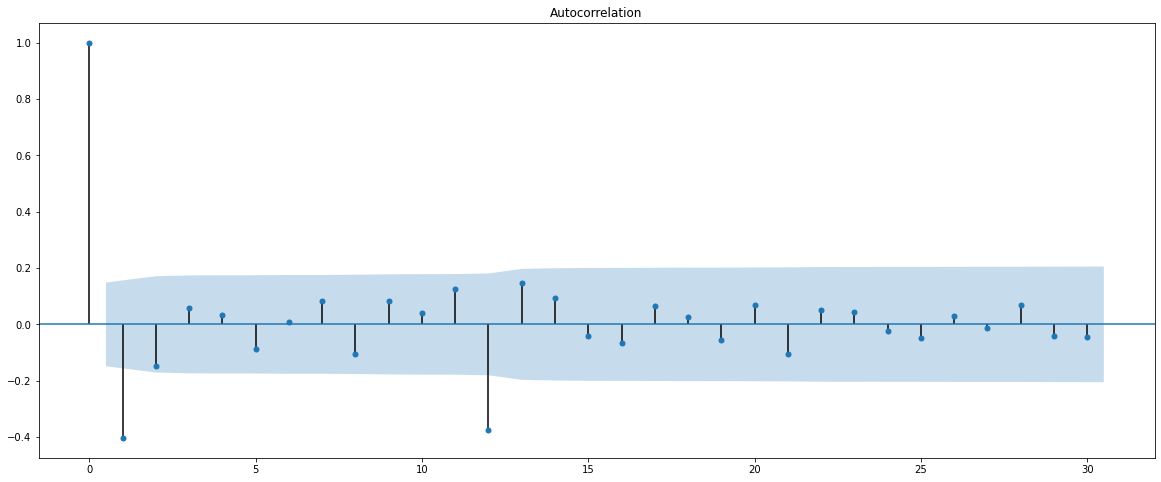

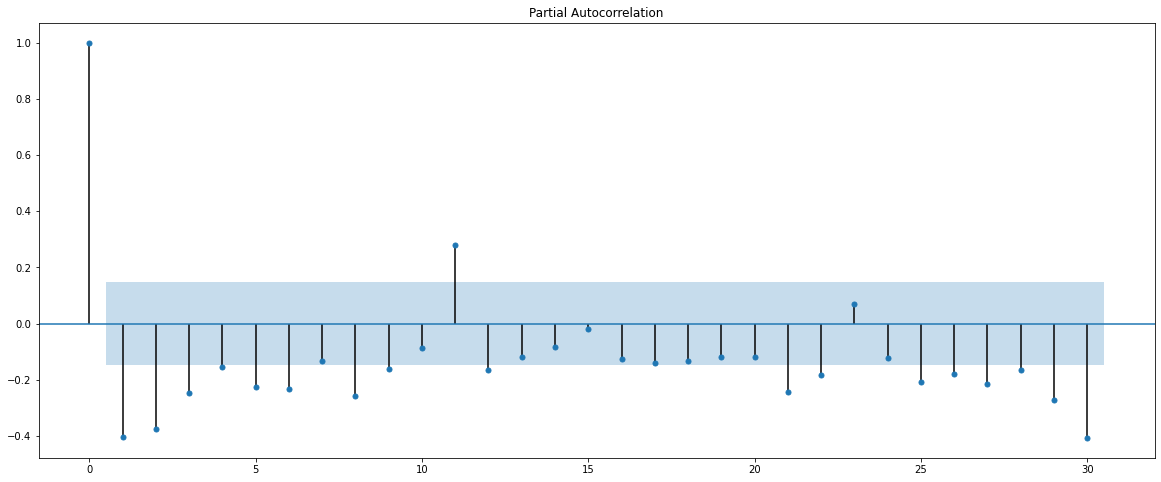

In [150]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.


In [151]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 0, 0),
                                seasonal_order=(0, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12= manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  132
Model:             SARIMAX(0, 2, 0, 12)   Log Likelihood                -857.674
Date:                  Sun, 25 Jul 2021   AIC                           1717.347
Time:                          14:29:14   BIC                           1720.020
Sample:                               0   HQIC                          1718.431
                                  - 132                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.34e+05    5.4e+04      9.890      0.000    4.28e+05     6.4e+05
Ljung-Box (L1) (Q):                   6.22   Jarque-Bera (JB):                17.23
Prob(Q):                       

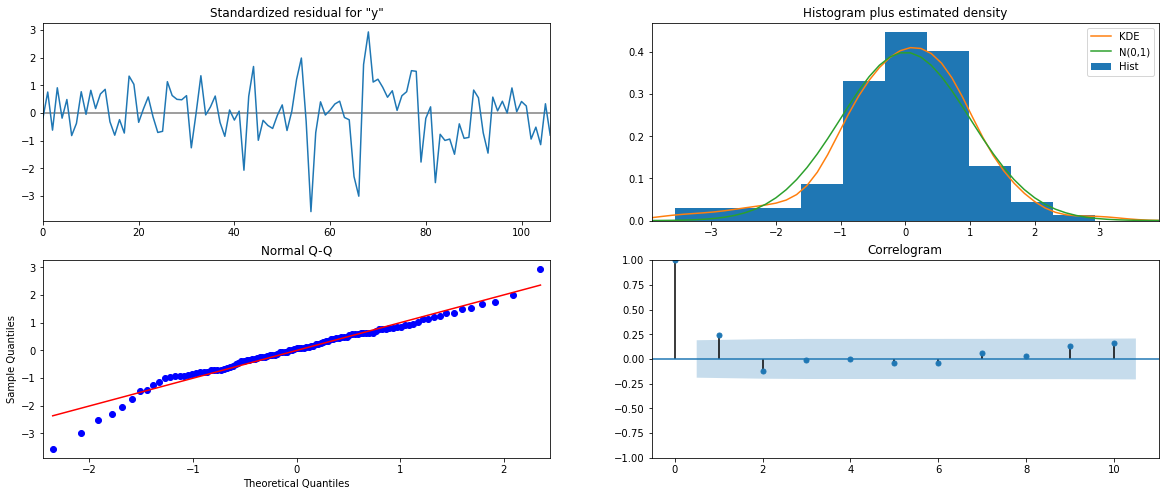

In [152]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [153]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [154]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y    mean  mean_se  mean_ci_lower  mean_ci_upper
0 1683.00   730.75         250.76        3115.24
1 1248.00   730.75        -184.24        2680.24
2 1736.00   730.75         303.76        3168.24
3 1606.00   730.75         173.76        3038.24
4 1576.00   730.75         143.76        3008.24

In [155]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

944.0149941027996


In [156]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,0,0)(0,2,0,12)/ACF-PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
SARIMA(1,1,2)(1,0,2,12)                                528.60
SARIMA(0,1,2)(2,0,2,24)                                639.88
ARIMA(0,0,0)/ACF-PACF                                 1275.08
SARIMA(0,0,0)(0,2,0,12)/ACF-PACF                       944.01

### Q 8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [157]:
resultsDf

Test RMSE
RegressionOnTime                                      1275.87
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                            813.40
4pointTrailingMovingAverage                           1156.59
6pointTrailingMovingAverage                           1283.93
9pointTrailingMovingAverage                           1346.28
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
SARIMA(1,1,2)(1,0,2,12)                                528.60
SARIMA(0,1,2)(2,0,2,24)                                639.88
ARIMA(0,0,0)/ACF-PACF                                 1275.08
SARIMA(0,0,0)(0,2,0,12)/ACF-PACF                       944.01

In [158]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE
Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponenti...     370.58
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...     469.59
SARIMA(1,1,2)(1,0,2,12)                                528.60
SARIMA(0,1,2)(2,0,2,24)                                639.88
2pointTrailingMovingAverage                            813.40
SARIMA(0,0,0)(0,2,0,12)/ACF-PACF                       944.01
4pointTrailingMovingAverage                           1156.59
Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing       1274.63
SimpleAverageModel                                    1275.08
ARIMA(0,0,0)/ACF-PACF                                 1275.08
RegressionOnTime                                      1275.87
Alpha=0.02,SimpleExponentialSmoothing                 1279.50
6pointTrailingMovingAverage                           1283.93
Alpha=0.04960,SimpleExponentialSmoothing              1316.04
9pointTrailingMovingAverage                           1346.28
ARIMA(2,1,2)                                          1374.11
ARIMA(1,1,1)                                          1461.67
NaiveModel                                            3864.28

### Q 9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

The model to be built on the whole data are the following:

* Alpha=0.03,Beta=0.02,Gamma=0.06,TripleExponentialSmoothing

In [173]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.03,
                                                                 smoothing_trend=0.02,
                                                                 smoothing_seasonal=0.06)

C:\Users\deept\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [174]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 379.8042317541343


In [175]:
def mape(actual, predicted):
    actual,predicted = np.array(actual),np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

mape = mape(df['Sparkling'],fullmodel.fittedvalues)
print('MAPE:', mape)

MAPE: 12.614088597664475


In [176]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel.forecast(steps=len(test))

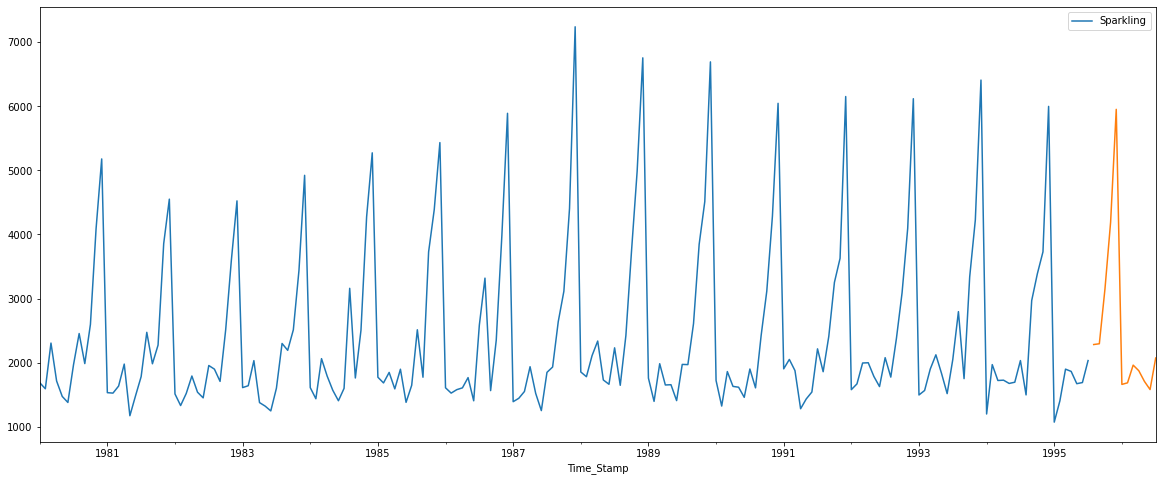

In [185]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [178]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction  upper_ci
1995-08-31   1535.86     2281.32   3026.79
1995-09-30   1548.12     2293.59   3039.06
1995-10-31   2405.70     3151.16   3896.63
1995-11-30   3446.44     4191.91   4937.37
1995-12-31   5207.72     5953.19   6698.66

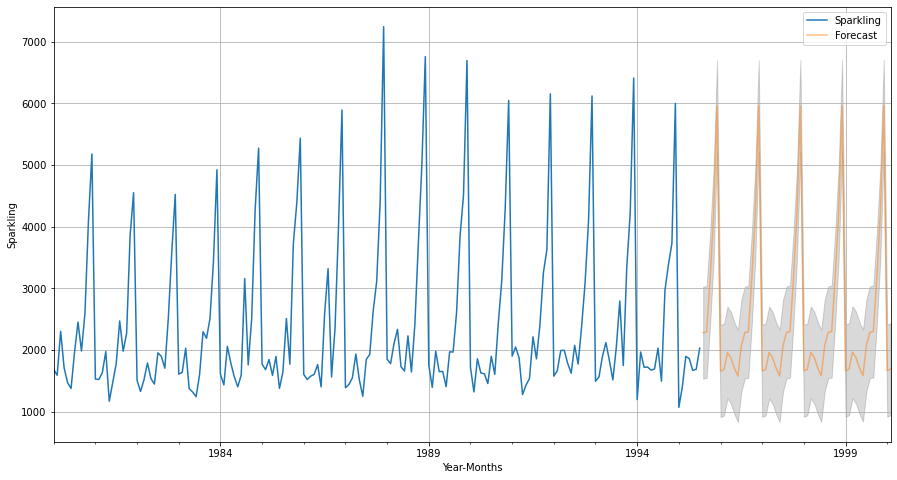

In [179]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

#### Let us now Evaluate the model on the whole data and predict 12 months into the future.

In [186]:
# Getting the predictions for 12 months into future
prediction_12 = fullmodel.forecast(steps=12)

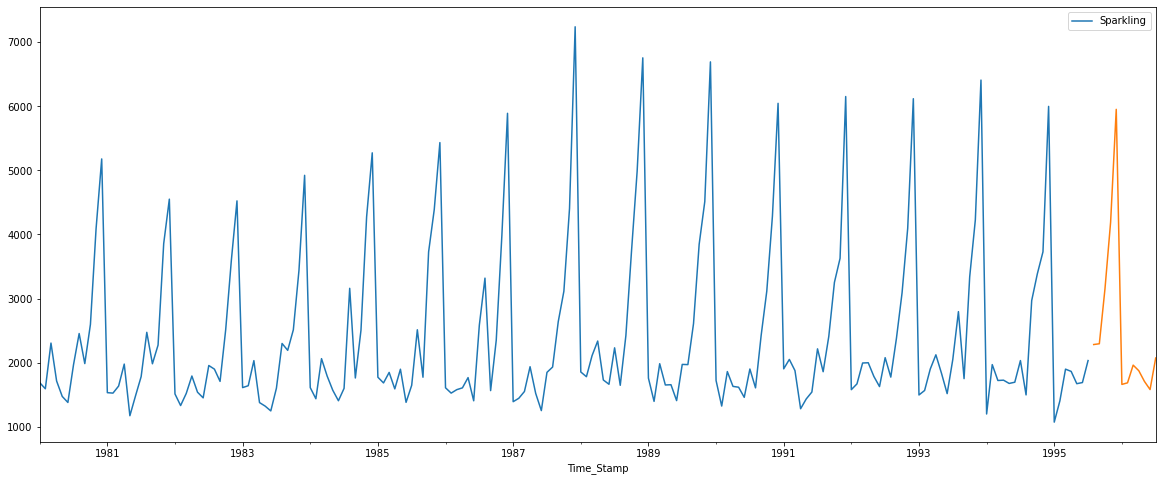

In [187]:
df.plot()
prediction_12.plot();

In [183]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_12_df = pd.DataFrame({'lower_CI':prediction_12 - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction_12,
                          'upper_ci': prediction_12 + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_12_df.head()

lower_CI  prediction  upper_ci
1995-08-31   1535.86     2281.32   3026.79
1995-09-30   1548.12     2293.59   3039.06
1995-10-31   2405.70     3151.16   3896.63
1995-11-30   3446.44     4191.91   4937.37
1995-12-31   5207.72     5953.19   6698.66

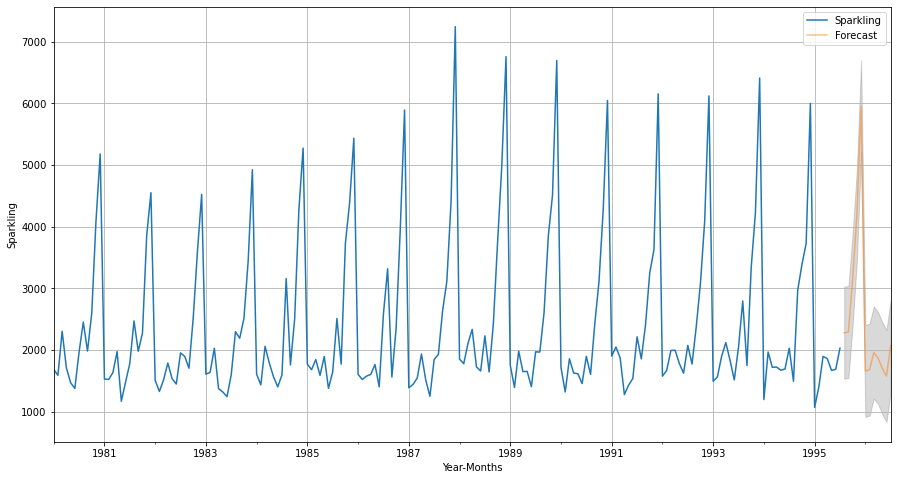

In [184]:
# plot the forecast for 12 months along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_12_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_12_df.index, pred_12_df['lower_CI'], pred_12_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

### Q 10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

- Refer to Sparkling Wine Business Report

### ThankYou!!